In [2]:
from Bio import Phylo
from io import StringIO

In [3]:
treedata = '((2[&type="dormant"]:1.8538)5[&type="active"]:0.014478,(((1[&type="active"]:0.069495,0[&type="active"]:0.069495)3[&type="active"]:1.04667)4[&type="dormant"]:0.03647)6[&type="active"]:0.715642)7[&type="active"]:0;'
handle = StringIO(treedata)
tree = Phylo.read(handle, 'newick', rooted=True)

In [4]:
tree.clade.clades[0]

Clade(branch_length=0.014478, comment='&type="active"', confidence=5)

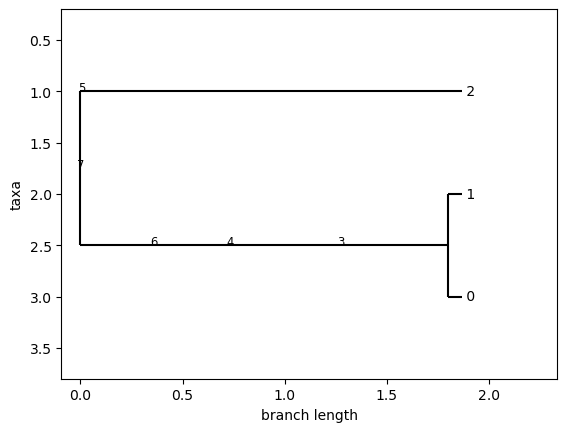

In [5]:
Phylo.draw(tree)

In [6]:
tree.clade

Clade(branch_length=0.0, comment='&type="active"', confidence=7)

In [7]:
def conf_to_names (tree):
  clades = [tree.clade]
  while (clades):
    nxt = []
    for c in clades:
      if c.confidence and not c.name:
        c.name=str(c.confidence)
        c.confidence=None
        if c.clades:
          nxt += c.clades
    clades = nxt

In [8]:
conf_to_names(tree)

In [9]:
import numpy as np
from treetime.seqgen import SeqGen
from treetime import GTR
from treetime.gtr import avg_transition

In [10]:
pi = np.array([0.25, 0.25, 0.25, 0.25])
gtr = GTR.standard(model='hky', mu=1.0, pi=pi, kappa=0.1)
gtr_d = GTR.standard(model='hky', mu=0.1, pi=pi, kappa=0.1)

In [11]:
sq = SeqGen(10, tree=tree, gtr=gtr, gtr_d = gtr_d)
sq.evolve_sb()
# print(sq.aln)


0.00	-TreeAnc: set-up

0.00	-SequenceData: loaded alignment.


In [12]:
aln = sq.get_aln(True)
print(aln)

Alignment with 8 rows and 10 columns
AGGGCTCGCC 7
AGGGCTCGCC 5
ACGGCACGCC 2
AAGCCTCTGC 6
AAGCCTCTGC 4
AAACCGCGCA 3
AAACCGCGCA 1
AAACCGCGCA 0


In [15]:
for seqrecord in aln._records:
  print(seqrecord.id, seqrecord.seq)

7 AGGGCTCGCC
5 AGGGCTCGCC
2 ACGGCACGCC
6 AAGCCTCTGC
4 AAGCCTCTGC
3 AAACCGCGCA
1 AAACCGCGCA
0 AAACCGCGCA


In [10]:
def f(s, translate):
  map_ = {}
  pairs = translate.split('\n')
  for pair in pairs:
    one, two = pair.split(" ")
    # print("'" + one + "'", "'" + two + "'")
    if one.strip().isnumeric():
      x = one.strip()
    else:
      raise Exception
    y = two if two[-1] != ',' else two[:-1]
    map_[x] = y
  
  pieces = s.split('[')
  new_pieces = []
  for p in pieces[:-1]:
    # print("examining " + p, p[-3].isnumeric(), p[-2].isnumeric(), p[-1].isnumeric())
    if p[-3:].isnumeric():
      label = p[-3:]
      if label in map_:
        new_p = p[:-3] + p[-3:].replace(label, map_[label])
        new_pieces.append(new_p)
      else:
        new_pieces.append(p)
    elif p[-2:].isnumeric():
      label = p[-2:]
      if label in map_:
        new_p = p[:-2] + p[-2:].replace(label, map_[label])
        new_pieces.append(new_p)
      else:
        new_pieces.append(p)
    elif p[-1].isnumeric():
      label = p[-1]
      if label in map_:
        new_p = p[:-1] + p[-1:].replace(label, map_[label])
        new_pieces.append(new_p)
      else:
        new_pieces.append(p)
  
  new_pieces.append(pieces[-1])
  print(len(pieces), pieces)
  print(len(new_pieces), new_pieces)
  return '['.join(new_pieces)

In [14]:
s = '((((((((((((((((((((((((((((((((((((((((((((((1[&type="active"]:0.0025115581987904534,2[&type="active"]:0.0025115581987904534)201[&type="active"]:0.04726441179443164,((3[&type="active"]:0.017839070850010685,(4[&type="active"]:0.015511770576228656,(5[&type="active"]:0.003992894896729382,(6[&type="active"]:1.6258158940551937E-4,7[&type="active"]:1.6258158940551937E-4)202[&type="active"]:0.0038303133073238627)203[&type="active"]:0.011518875679499274)204[&type="active"]:0.002327300273782029)205[&type="active"]:0.031028898597851295,((8[&type="active"]:0.009787899076947326,9[&type="active"]:0.009787899076947326)206[&type="active"]:0.01268438044877307,((10[&type="active"]:0.006319869120140709,(11[&type="active"]:0.0035606129674654596,12[&type="active"]:0.0035606129674654596)207[&type="active"]:0.002759256152675249)208[&type="active"]:0.012183353778128847,(13[&type="active"]:0.00805951766153612,(14[&type="active"]:0.0024980681997845977,(15[&type="active"]:0.0016027246408167883,(16[&type="active"]:4.677938919481761E-4,17[&type="active"]:4.677938919481761E-4)209[&type="active"]:0.0011349307488686122)210[&type="active"]:8.953435589695857E-4)211[&type="active"]:0.005561449461751522)212[&type="active"]:0.01044370523673166)213[&type="active"]:0.003969056627452616)214[&type="active"]:0.02639568992213981)215[&type="active"]:9.08000545363663E-4)216[&type="active"]:0.1706160042566598,((18[&type="active"]:0.10676693788644798,((19[&type="active"]:0.0034262092987908943,20[&type="active"]:0.0034262092987908943)217[&type="active"]:0.010232358723071044,(21[&type="active"]:0.00928781609871443,22[&type="active"]:0.00928781609871443)218[&type="active"]:0.004370751923147509)219[&type="active"]:0.09310836986458604)220[&type="active"]:0.06326915179899295,(((23[&type="active"]:0.002273860123770177,(24[&type="active"]:4.8092401537047635E-4,25[&type="active"]:4.8092401537047635E-4)221[&type="active"]:0.0017929361083997009)222[&type="active"]:0.04845597775466537,(((26[&type="active"]:0.004967664917623793,(27[&type="active"]:0.0021895324782441605,28[&type="active"]:0.0021895324782441605)223[&type="active"]:0.0027781324393796325)224[&type="active"]:0.01539556403426623,((29[&type="active"]:0.005186917607900909,30[&type="active"]:0.005186917607900909)225[&type="active"]:0.010124865385044757,(31[&type="active"]:0.004867945425004905,(32[&type="active"]:0.001361526011811165,33[&type="active"]:0.001361526011811165)226[&type="active"]:0.00350641941319374)227[&type="active"]:0.010443837567940761)228[&type="active"]:0.005051445958944356)229[&type="active"]:0.01841528142487725,(((34[&type="active"]:0.005005613715045598,35[&type="active"]:0.005005613715045598)230[&type="active"]:0.02119795915022138,((36[&type="active"]:0.004217930046831242,37[&type="active"]:0.004217930046831242)231[&type="active"]:0.010977378047218878,((38[&type="active"]:0.004112403665944342,39[&type="active"]:0.004112403665944342)232[&type="active"]:0.009987223485554253,(40[&type="active"]:0.0016014587255668289,41[&type="active"]:0.0016014587255668289)233[&type="active"]:0.012498168425933542)234[&type="active"]:0.0010956809425497482)235[&type="active"]:0.011008264771216858)236[&type="active"]:0.005114112566037221,((42[&type="active"]:0.002749402775206633,43[&type="active"]:0.002749402775206633)237[&type="active"]:0.015590990134530358,(44[&type="active"]:0.011244135184689696,((45[&type="active"]:0.0022316287707688787,46[&type="active"]:0.0022316287707688787)238[&type="active"]:0.005870812690801586,((47[&type="active"]:0.0011196566602027502,48[&type="active"]:0.0011196566602027502)239[&type="active"]:0.004111924441810189,(49[&type="active"]:0.0010260156877617277,(50[&type="active"]:5.333159187994596E-4,51[&type="active"]:5.333159187994596E-4)240[&type="active"]:4.926997689604917E-4)241[&type="active"]:0.004205565414251211)242[&type="active"]:0.002870860359559302)243[&type="active"]:0.0031416937231174558)244[&type="active"]:0.007096257725045518)245[&type="active"]:0.012977292521567207)246[&type="active"]:0.007460824945463074)247[&type="active"]:0.01195132750167005)248[&type="active"]:0.09203228246032502,(52[&type="active"]:0.11568817371865592,((53[&type="active"]:0.04907513543076547,(54[&type="active"]:0.006849557807370843,(55[&type="active"]:0.0068003288542985985,56[&type="active"]:0.0068003288542985985)249[&type="active"]:4.922895307224451E-5)250[&type="active"]:0.04222557762339463)251[&type="active"]:0.06398049919834925,(((57[&type="active"]:0.03703446258888299,(58[&type="active"]:0.014983283299995875,(59[&type="active"]:0.009351998294684805,(60[&type="active"]:0.005649542062998947,(61[&type="active"]:4.399280076157197E-4,(62[&type="active"]:3.8258745499852864E-4,63[&type="active"]:3.8258745499852864E-4)252[&type="active"]:5.7340552617191065E-5)253[&type="active"]:0.005209614055383227)254[&type="active"]:0.0037024562316840814)255[&type="active"]:0.005631285005311071)256[&type="active"]:0.022051179288887113)257[&type="active"]:0.013708177444849312,((64[&type="active"]:0.0058516519520317445,65[&type="active"]:0.0058516519520317445)258[&type="active"]:0.021155651706736833,(66[&type="active"]:0.020925183149888227,((67[&type="active"]:0.005558081302041273,68[&type="active"]:0.005558081302041273)259[&type="active"]:0.008525700253228408,(69[&type="active"]:0.013559653924559711,(70[&type="active"]:0.0084944465975898,(71[&type="active"]:0.007759248915101935,72[&type="active"]:0.007759248915101935)260[&type="active"]:7.351976824860884E-4)261[&type="active"]:0.005065207326969912)262[&type="active"]:5.241276307099696E-4)263[&type="active"]:0.0068414015946167694)264[&type="active"]:0.006082120508882127)265[&type="active"]:0.023735336374961946)266[&type="active"]:0.020219332368926146,(((73[&type="active"]:0.012303815455801725,(74[&type="active"]:0.0033424547693421403,75[&type="active"]:0.0033424547693421403)267[&type="active"]:0.008961360686459585)268[&type="active"]:0.021918430713496306,(76[&type="active"]:0.007672102453110341,(77[&type="active"]:0.003323280469798462,(78[&type="active"]:0.0022389381339316117,79[&type="active"]:0.0022389381339316117)269[&type="active"]:0.0010843423358668502)270[&type="active"]:0.004348821983311879)271[&type="active"]:0.02655014371618769)272[&type="active"]:0.02963737329176297,((80[&type="active"]:1.229875395569735E-4,81[&type="active"]:1.229875395569735E-4)273[&type="active"]:0.005904849316836547,((82[&type="active"]:0.004454141082895546,(83[&type="active"]:0.0035914920077342316,84[&type="active"]:0.0035914920077342316)274[&type="active"]:8.626490751613147E-4)275[&type="active"]:0.0014679813689006949,(85[&type="active"]:0.005676411659679914,((86[&type="active"]:0.003896295412280537,87[&type="active"]:0.003896295412280537)276[&type="active"]:0.001670555952660635,(88[&type="active"]:0.004207689655011393,89[&type="active"]:0.004207689655011393)277[&type="active"]:0.0013591617099297792)278[&type="active"]:1.0956029473874196E-4)279[&type="active"]:2.4571079211810343E-4)280[&type="active"]:1.057144045972791E-4)281[&type="active"]:0.05783178260466748)282[&type="active"]:0.007102352941595669)283[&type="active"]:0.042093662226456274)284[&type="active"]:0.002632539089541197)285[&type="active"]:0.02707394662010465)286[&type="active"]:0.02727396934668036)287[&type="active"]:0.05035588456444273)288[&type="active"]:0.23677474959595252)408[&type="dormant"]:0.5311863135545414)409[&type="active"]:0.06130318078465802)410[&type="dormant"]:0.33578808452992237)411[&type="active"]:0.08631614738346394)412[&type="dormant"]:0.9608989359269109)413[&type="active"]:0.1288145518856023)414[&type="dormant"]:0.463746550875622)415[&type="active"]:0.02556074054755353)416[&type="dormant"]:1.0614108689202828)417[&type="active"]:0.03770239985855195)418[&type="dormant"]:0.1340758384314329)419[&type="active"]:0.04822744041130722)420[&type="dormant"]:0.479441032799925)421[&type="active"]:0.017934685594737765)422[&type="dormant"]:2.175096216268151)423[&type="active"]:0.6373507034829116)424[&type="dormant"]:0.7073102328306904)425[&type="active"]:0.21209840381849432)426[&type="dormant"]:0.693617254265078)427[&type="active"]:0.29033694929741927)428[&type="dormant"]:0.23771995169235893)429[&type="active"]:0.10470858240857162)430[&type="dormant"]:0.15833484457768243)431[&type="active"]:0.04337755569611268)432[&type="dormant"]:0.15456731255470046)433[&type="active"]:0.12577388680366575)434[&type="dormant"]:0.26335387533395327)435[&type="active"]:0.24902168990759144)436[&type="dormant"]:0.15714774155781086)437[&type="active"]:0.2618093624452804)438[&type="dormant"]:0.5618662871518385)439[&type="active"]:0.01363086128614377)440[&type="dormant"]:0.24206591279444467)441[&type="active"]:0.06398522330000844)442[&type="dormant"]:1.494988278793949)443[&type="active"]:0.04711831304781633)444[&type="dormant"]:0.3305078510739481)445[&type="active"]:0.03631456332531435)446[&type="dormant"]:0.05205437003436941)447[&type="active"]:0.32367302456021285)448[&type="dormant"]:0.24063859692036793)449[&type="active"]:0.37205674885739626,(((((((((((((((((((((((((((((((((((((((((((((((((90[&type="active"]:2.720460919363177E-4,91[&type="active"]:2.720460919363177E-4)289[&type="active"]:0.042563560735048966,(92[&type="active"]:0.010590011081056616,(93[&type="active"]:0.0019419972695953192,94[&type="active"]:0.0019419972695953192)290[&type="active"]:0.008648013811461297)291[&type="active"]:0.032245595745930444)292[&type="active"]:0.14333316785490446)450[&type="dormant"]:0.05135771047540291)451[&type="active"]:0.5084150343709798)452[&type="dormant"]:0.25746940788988326)453[&type="active"]:0.09099891510487068)454[&type="dormant"]:0.04456272752027601)455[&type="active"]:1.229140955773288)456[&type="dormant"]:0.2641264361786)457[&type="active"]:0.19157845309272314)458[&type="dormant"]:0.10429809239083498)459[&type="active"]:0.05190490178256413)460[&type="dormant"]:0.11065793315337125)461[&type="active"]:0.2225173550315498,(((((((((95[&type="active"]:0.026022202241479074)400[&type="dormant"]:0.09491228567790116)401[&type="active"]:0.05852494577483944)402[&type="dormant"]:0.15158235084787874)403[&type="active"]:0.3532681090472578)404[&type="dormant"]:0.24505962080382304)405[&type="active"]:0.06997500019480496)406[&type="dormant"]:0.39311115297549293)407[&type="active"]:0.28424423671676746,((((((((((96[&type="active"]:0.16791054589809562,((97[&type="active"]:0.002372669677191297,(98[&type="active"]:1.630893129540567E-4,99[&type="active"]:1.630893129540567E-4)293[&type="active"]:0.002209580364235464)294[&type="active"]:0.10555945676496137,((100[&type="active"]:0.01068518968793164,101[&type="active"]:0.01068518968793164)295[&type="active"]:0.0021337863691055503,(102[&type="active"]:0.012126443221150751,(103[&type="active"]:0.009709046725259185,(104[&type="active"]:0.0026544979281624137,(105[&type="active"]:0.0021600531402725665,(106[&type="active"]:0.002109234857380571,107[&type="active"]:0.002109234857380571)296[&type="active"]:5.0818282891995636E-5)297[&type="active"]:4.944447878916236E-4)298[&type="active"]:0.007054548797096771)299[&type="active"]:0.002417396495891566)300[&type="active"]:6.925328358864391E-4)301[&type="active"]:0.0951131503851137)302[&type="active"]:0.059978419455942955)303[&type="active"]:0.002855912756145218)462[&type="dormant"]:0.32704366031631776)463[&type="active"]:0.14813379027276263)464[&type="dormant"]:0.08366864955122566)465[&type="active"]:0.0167841884530765)466[&type="dormant"]:0.02309195571443612)467[&type="active"]:0.23976788609006083)468[&type="dormant"]:0.1375552676554772)469[&type="active"]:0.440201828172188,((((((108[&type="active"]:0.005300243108404601,109[&type="active"]:0.005300243108404601)304[&type="active"]:3.714777937106218E-4)470[&type="dormant"]:1.2317247355608512)471[&type="active"]:5.927122990774247E-4)472[&type="dormant"]:0.2591151222327499)473[&type="active"]:0.001340115900604566,((((((((((((110[&type="active"]:0.06267780753337249,(111[&type="active"]:0.049757271599654374,(112[&type="active"]:0.01878495526126578,(113[&type="active"]:0.007306160203555123,(114[&type="active"]:0.005534837988095731,115[&type="active"]:0.005534837988095731)305[&type="active"]:0.0017713222154593922)306[&type="active"]:0.011478795057710656)307[&type="active"]:0.030972316338388595)308[&type="active"]:0.012920535933718114)309[&type="active"]:0.04329962612171023,((116[&type="active"]:0.04856724587006234,(117[&type="active"]:0.027273729986982076,(118[&type="active"]:4.6010487502456954E-4,119[&type="active"]:4.6010487502456954E-4)310[&type="active"]:0.026813625111957506)311[&type="active"]:0.02129351588308026)312[&type="active"]:0.026644029983994955,(120[&type="active"]:0.0729860532423956,(121[&type="active"]:0.008523491677246753,(122[&type="active"]:0.004327856517631901,(123[&type="active"]:2.8127797709665003E-4,124[&type="active"]:2.8127797709665003E-4)313[&type="active"]:0.004046578540535251)314[&type="active"]:0.004195635159614852)315[&type="active"]:0.06446256156514885)316[&type="active"]:0.0022252226116616924)317[&type="active"]:0.030766157801027205)318[&type="active"]:0.01298192499014661,(((125[&type="active"]:0.012373427175305096,(126[&type="active"]:0.009786927787615696,(127[&type="active"]:0.001617279567751595,128[&type="active"]:0.001617279567751595)319[&type="active"]:0.0081696482198641)320[&type="active"]:0.0025864993876894005)321[&type="active"]:0.010177632102051248,(129[&type="active"]:0.011740202696469026,((130[&type="active"]:0.006115378212276923,131[&type="active"]:0.006115378212276923)322[&type="active"]:0.003577486559331433,(132[&type="active"]:0.001828677214808394,(133[&type="active"]:0.0012767374964983702,134[&type="active"]:0.0012767374964983702)323[&type="active"]:5.519397183100239E-4)324[&type="active"]:0.007864187556799962)325[&type="active"]:0.002047337924862447)326[&type="active"]:0.010810856580885542)327[&type="active"]:0.06950109964166096,((135[&type="active"]:0.014086543409558061,136[&type="active"]:0.014086543409558061)328[&type="active"]:0.025677551054844372,((137[&type="active"]:0.0021224737570424423,(138[&type="active"]:9.042486498369584E-4,139[&type="active"]:9.042486498369584E-4)329[&type="active"]:0.001218225107205484)330[&type="active"]:0.02515118829041718,(140[&type="active"]:0.012483981943811173,((141[&type="active"]:3.573387952453544E-4,142[&type="active"]:3.573387952453544E-4)331[&type="active"]:0.008575852507581416,(143[&type="active"]:0.0011336564808690497,144[&type="active"]:0.0011336564808690497)332[&type="active"]:0.007799534821959497)333[&type="active"]:0.0035507906409844026)334[&type="active"]:0.01478968010364845)335[&type="active"]:0.01249043241694281)336[&type="active"]:0.05228806445461309)337[&type="active"]:0.026907199726213804)338[&type="active"]:5.096524269360136E-4)474[&type="dormant"]:0.45078670590171666)475[&type="active"]:1.6998842160997896E-4)476[&type="dormant"]:0.29284999772363585)477[&type="active"]:3.005380050489226E-4,(((145[&type="active"]:0.004750554511950611,(146[&type="active"]:0.0026505791329292094,147[&type="active"]:0.0026505791329292094)339[&type="active"]:0.0020999753790214015)340[&type="active"]:0.2014441289257043,(((148[&type="active"]:0.04168757549816959,(149[&type="active"]:0.014567079305441766,(150[&type="active"]:8.168374523034316E-4,151[&type="active"]:8.168374523034316E-4)341[&type="active"]:0.013750241853138334)342[&type="active"]:0.027120496192727828)343[&type="active"]:0.014582514251072709,((152[&type="active"]:0.006835971159802057,153[&type="active"]:0.006835971159802057)344[&type="active"]:0.034953922853036445,(154[&type="active"]:0.011340317045101855,(155[&type="active"]:0.004221560759351206,(156[&type="active"]:0.0011000465932848869,157[&type="active"]:0.0011000465932848869)345[&type="active"]:0.0031215141660663193)346[&type="active"]:0.007118756285750649)347[&type="active"]:0.03044957696773487)348[&type="active"]:0.014480195736405577)349[&type="active"]:0.10564124361841465,(((158[&type="active"]:0.00529053809522928,159[&type="active"]:0.00529053809522928)350[&type="active"]:0.004157327847812198,(160[&type="active"]:0.007443968154845493,(161[&type="active"]:0.004608489256193948,(162[&type="active"]:0.00407017366322826,163[&type="active"]:0.00407017366322826)351[&type="active"]:5.38315592965688E-4)352[&type="active"]:0.0028354788986515445)353[&type="active"]:0.002003897788195985)354[&type="active"]:0.004564558664380769,((164[&type="active"]:0.004787183804987549,165[&type="active"]:0.004787183804987549)355[&type="active"]:0.00428617710377921,(166[&type="active"]:0.006771539552847372,(167[&type="active"]:0.00570869881504521,(168[&type="active"]:0.0022086694396765694,(169[&type="active"]:4.757939265438438E-4,170[&type="active"]:4.757939265438438E-4)356[&type="active"]:0.0017328755131327256)357[&type="active"]:0.0035000293753668643)358[&type="active"]:0.0010628407378039384)359[&type="active"]:0.0023018213559176104)360[&type="active"]:0.0049390636986572645)361[&type="active"]:0.1478989087602347)362[&type="active"]:0.044283350069996175)363[&type="active"]:0.05937339390719565,((171[&type="active"]:0.0500683426567754,(172[&type="active"]:0.03649872646585095,(173[&type="active"]:0.00885846197384943,174[&type="active"]:0.00885846197384943)364[&type="active"]:0.02764026449200152)365[&type="active"]:0.01356961619092445)366[&type="active"]:0.08793951135736755,(((175[&type="active"]:0.005153938218105836,(176[&type="active"]:0.0016644764085320674,177[&type="active"]:0.0016644764085320674)367[&type="active"]:0.0034894618095737684)368[&type="active"]:0.1142087412126287,((178[&type="active"]:0.00239895994656969,179[&type="active"]:0.00239895994656969)369[&type="active"]:0.04023915285763735,((180[&type="active"]:0.008250900349336732,(181[&type="active"]:2.5888062509693555E-5,182[&type="active"]:2.5888062509693555E-5)370[&type="active"]:0.008225012286827038)371[&type="active"]:0.01223690773257502,(183[&type="active"]:0.007562379835498234,(184[&type="active"]:0.0054494311191710665,(185[&type="active"]:0.0036428497059635134,186[&type="active"]:0.0036428497059635134)372[&type="active"]:0.001806581413207553)373[&type="active"]:0.0021129487163271676)374[&type="active"]:0.012925428246413517)375[&type="active"]:0.02215030472229529)376[&type="active"]:0.07672456662652749)377[&type="active"]:0.013698505527168336,((187[&type="active"]:0.034991139027860996,(188[&type="active"]:0.012105674037782066,(189[&type="active"]:0.0031639541471903954,190[&type="active"]:0.0031639541471903954)378[&type="active"]:0.00894171989059167)379[&type="active"]:0.02288546499007893)380[&type="active"]:0.042418795574548085,((191[&type="active"]:3.534421101800689E-4,192[&type="active"]:3.534421101800689E-4)381[&type="active"]:0.06076249090494379,(193[&type="active"]:0.027959615751143474,(194[&type="active"]:0.020255437093590345,(195[&type="active"]:0.01755434635975739,((196[&type="active"]:7.909068481612991E-4,197[&type="active"]:7.909068481612991E-4)382[&type="active"]:0.005599081606707301,(198[&type="active"]:0.0029534226931549057,(199[&type="active"]:7.358045971450622E-4,200[&type="active"]:7.358045971450622E-4)383[&type="active"]:0.0022176180960098435)384[&type="active"]:0.0034365657617136947)385[&type="active"]:0.011164357904888789)386[&type="active"]:0.002701090733832956)387[&type="active"]:0.007704178657553129)388[&type="active"]:0.033156317263980384)389[&type="active"]:0.016294001587283446)390[&type="active"]:0.055651250355493787)391[&type="active"]:0.004946669056240083)392[&type="active"]:0.1275602233307076)393[&type="active"]:0.5980081637793244)394[&type="active"]:0.2735213250621107)478[&type="dormant"]:0.1574152788793497)479[&type="active"]:0.002253550844455887)480[&type="dormant"]:0.10756484694657797)481[&type="active"]:0.09411316403872916)395[&type="active"]:0.08856927798438541)396[&type="active"]:0.08968621940046084)397[&type="active"]:1.6364967931659926)398[&type="active"]:0.026938705687597597)482[&type="dormant"]:0.5064106975177953)483[&type="active"]:0.1638893361803344)484[&type="dormant"]:0.09169108024698236)485[&type="active"]:0.44352631553446287)486[&type="dormant"]:0.39006801376544775)487[&type="active"]:0.006469967307851654)488[&type="dormant"]:0.7205602128339654)489[&type="active"]:0.5543431909814043)490[&type="dormant"]:1.148719074125112)491[&type="active"]:0.009541479600255975)492[&type="dormant"]:0.05715643475422727)493[&type="active"]:0.12535833202668734)494[&type="dormant"]:0.4254685797628639)495[&type="active"]:0.09678697538774905)496[&type="dormant"]:0.4524101039222401)497[&type="active"]:0.3973797212559571)498[&type="dormant"]:0.19473578468493535)499[&type="active"]:0.6304319323382028)500[&type="dormant"]:0.739941742237642)501[&type="active"]:0.01544135237943145)502[&type="dormant"]:0.5936671623103429)503[&type="active"]:0.03542572739083205)504[&type="dormant"]:0.13838740653392634)505[&type="active"]:0.08027763680382982)506[&type="dormant"]:0.5676371431246388)507[&type="active"]:0.050321129415650034)508[&type="dormant"]:0.6253948037318189)509[&type="active"]:0.0773502217068689)510[&type="dormant"]:0.5381853684069178)511[&type="active"]:0.0910684397543271)512[&type="dormant"]:0.4029334248173928)513[&type="active"]:0.0024674237085893225)514[&type="dormant"]:1.247751610127489)515[&type="active"]:0.11876486162662125)399[&type="active"]:0.0;'
translate = '''1 116,
			2 12,
			3 163,
			4 165,
			5 85,
			6 44,
			7 74,
			8 75,
			9 192,
			10 86,
			11 89,
			12 94,
			13 78,
			14 173,
			15 32,
			16 22,
			17 182,
			18 59,
			19 166,
			20 84,
			21 114,
			22 175,
			23 162,
			24 54,
			25 48,
			26 129,
			27 136,
			28 66,
			29 123,
			30 98,
			31 193,
			32 3,
			33 154,
			34 10,
			35 158,
			36 113,
			37 80,
			38 100,
			39 24,
			40 56,
			41 57,
			42 93,
			43 119,
			44 63,
			45 125,
			46 29,
			47 49,
			48 0,
			49 148,
			50 72,
			51 157,
			52 46,
			53 96,
			54 11,
			55 108,
			56 183,
			57 147,
			58 9,
			59 50,
			60 153,
			61 70,
			62 23,
			63 15,
			64 197,
			65 6,
			66 31,
			67 71,
			68 160,
			69 110,
			70 137,
			71 81,
			72 103,
			73 7,
			74 179,
			75 76,
			76 127,
			77 5,
			78 138,
			79 95,
			80 140,
			81 45,
			82 62,
			83 167,
			84 170,
			85 145,
			86 181,
			87 199,
			88 112,
			89 36,
			90 106,
			91 104,
			92 156,
			93 130,
			94 135,
			95 172,
			96 1,
			97 42,
			98 21,
			99 4,
			100 164,
			101 187,
			102 88,
			103 133,
			104 117,
			105 190,
			106 124,
			107 28,
			108 115,
			109 155,
			110 26,
			111 87,
			112 27,
			113 171,
			114 14,
			115 176,
			116 105,
			117 132,
			118 34,
			119 35,
			120 33,
			121 139,
			122 79,
			123 47,
			124 169,
			125 25,
			126 151,
			127 30,
			128 101,
			129 8,
			130 39,
			131 159,
			132 19,
			133 83,
			134 60,
			135 107,
			136 40,
			137 131,
			138 53,
			139 43,
			140 109,
			141 191,
			142 51,
			143 67,
			144 178,
			145 196,
			146 20,
			147 82,
			148 65,
			149 195,
			150 58,
			151 68,
			152 61,
			153 97,
			154 184,
			155 91,
			156 198,
			157 142,
			158 41,
			159 128,
			160 120,
			161 13,
			162 188,
			163 150,
			164 186,
			165 73,
			166 55,
			167 2,
			168 149,
			169 16,
			170 185,
			171 92,
			172 118,
			173 177,
			174 152,
			175 161,
			176 121,
			177 102,
			178 99,
			179 122,
			180 37,
			181 90,
			182 168,
			183 38,
			184 52,
			185 143,
			186 189,
			187 180,
			188 146,
			189 69,
			190 134,
			191 174,
			192 64,
			193 194,
			194 17,
			195 144,
			196 141,
			197 18,
			198 126,
			199 77,
			200 111'''

In [15]:
t = f(s, translate)

516 ['((((((((((((((((((((((((((((((((((((((((((((((1', '&type="active"]:0.0025115581987904534,2', '&type="active"]:0.0025115581987904534)201', '&type="active"]:0.04726441179443164,((3', '&type="active"]:0.017839070850010685,(4', '&type="active"]:0.015511770576228656,(5', '&type="active"]:0.003992894896729382,(6', '&type="active"]:1.6258158940551937E-4,7', '&type="active"]:1.6258158940551937E-4)202', '&type="active"]:0.0038303133073238627)203', '&type="active"]:0.011518875679499274)204', '&type="active"]:0.002327300273782029)205', '&type="active"]:0.031028898597851295,((8', '&type="active"]:0.009787899076947326,9', '&type="active"]:0.009787899076947326)206', '&type="active"]:0.01268438044877307,((10', '&type="active"]:0.006319869120140709,(11', '&type="active"]:0.0035606129674654596,12', '&type="active"]:0.0035606129674654596)207', '&type="active"]:0.002759256152675249)208', '&type="active"]:0.012183353778128847,(13', '&type="active"]:0.00805951766153612,(14', '&type="active"]:0.002498

In [16]:
t

'((((((((((((((((((((((((((((((((((((((((((((((116[&type="active"]:0.0025115581987904534,12[&type="active"]:0.0025115581987904534)201[&type="active"]:0.04726441179443164,((163[&type="active"]:0.017839070850010685,(165[&type="active"]:0.015511770576228656,(85[&type="active"]:0.003992894896729382,(44[&type="active"]:1.6258158940551937E-4,74[&type="active"]:1.6258158940551937E-4)202[&type="active"]:0.0038303133073238627)203[&type="active"]:0.011518875679499274)204[&type="active"]:0.002327300273782029)205[&type="active"]:0.031028898597851295,((75[&type="active"]:0.009787899076947326,192[&type="active"]:0.009787899076947326)206[&type="active"]:0.01268438044877307,((86[&type="active"]:0.006319869120140709,(89[&type="active"]:0.0035606129674654596,94[&type="active"]:0.0035606129674654596)207[&type="active"]:0.002759256152675249)208[&type="active"]:0.012183353778128847,(78[&type="active"]:0.00805951766153612,(173[&type="active"]:0.0024980681997845977,(32[&type="active"]:0.0016027246408167883,(

In [21]:
ss = s.split('[')
ss

['(((0',
 '&type="active"]:1.7587437582073708,((8',
 '&type="active"]:0.38147330761772585,(1',
 '&type="active"]:0.0027381143056503564,9',
 '&type="active"]:0.0027381143056503564)10',
 '&type="active"]:0.3787351933120755)15',
 '&type="active"]:1.0391780279210177,6',
 '&type="active"]:1.4206513355387436)19',
 '&type="active"]:0.33809242266862727)21',
 '&type="active"]:0.1164176096316869,(2',
 '&type="active"]:0.6142773153634882,(3',
 '&type="active"]:0.11622721423676706,(7',
 '&type="active"]:0.05264705655786052,5',
 '&type="active"]:0.05264705655786052)11',
 '&type="active"]:0.06358015767890654)12',
 '&type="active"]:0.4980501011267211)17',
 '&type="active"]:1.2608840524755696)22',
 '&type="active"]:6.115938739715533,4',
 '&type="active"]:7.99110010755459)24',
 '&type="active"]:0.0;']

In [4]:
import tskit
import msprime
import SVG

ModuleNotFoundError: No module named 'SVG'

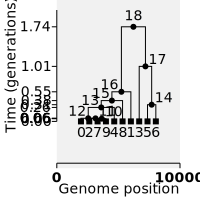

In [17]:
ts = msprime.sim_ancestry(
    samples=10, 
    ploidy=1, 
    sequence_length=10000,
    random_seed=6)
ts.draw_svg(y_axis=True)

In [26]:
ts.first().as_newick()

'((n1:0.54602989773039745,(n8:0.38365720127238884,(n4:0.25776161481767146,(n0:0.05768408570687087,(n2:0.05616298294613138,(n7:0.04963600572920028,n9:0.04963600572920028):0.00652697721693110):0.00152110276073949):0.20007752911080059):0.12589558645471738):0.16237269645800861):1.19873671212975275,(n3:1.01487989641828991,(n5:0.30807055245007420,n6:0.30807055245007420):0.70680934396821571):0.72988671344186029);'

In [21]:
mutated_ts = msprime.sim_mutations(ts, rate=0.01, random_seed=6)

In [24]:
len(list(mutated_ts.variants()))

615

In [76]:
from scipy.spatial import distance

In [83]:
with open("./tree_10_vaughan/4.10/simulate_mutation_output.txt", "r") as file:
    for i in range(5):
        file.readline()

    seq = {}

    for i in range(100):
        line = file.readline()
        l, r = line.split(" ")
        seq[int(l)] = r


In [87]:
distance.hamming(list(seq[0]), list(seq[1])) * 20000

2524.8737563121845

In [91]:
dist = {}
for i in range(100):
  for j in range(i+1, 100):
    dist[(i, j)] = distance.hamming(list(seq[i]), list(seq[j])) * 20000
    dist[(j, i)] = dist[(i, j)]

In [ ]:
clade = [28, 39, 46, 98, 72, 9, 12, 0, 50, 93, 95, 77, 15]
clade = [4, 74, 51, 65, 82, 54, 20, 3, 32]
clade = [28, 50, 82, 20]
clade = [36, 44, 52, 79, 19, 29, 11, 99, 86, 62, 10, 89, 14, 80, 90, 84, 64, 6, 27, 83, 97, 38, 69, 68, 1, 56, 35, 45, 66, 25, 41, 2, 16, 53, 94, 78, 40, 47]
sum_ = 0
for i in range(len(clade)):
  for j in range(i+1, len(clade)):
    print(dist[clade[i], clade[j]])
    sum_ += dist[clade[i], clade[j]]
  print("---------------")

In [108]:
dist[(4, 36)]

2102.894855257237